# Predicting Vehicle Prices Using Regression Models

## **Objectives**  
The primary goal of this project is to develop a robust regression model to predict used car prices for a reseller based on various listed features and specifications. In addition to predicting prices, the project focuses on identifying feature importance and mitigating overfitting through the application of regularisation techniques.

There can be several business objectives for this, such as:

* **Price Prediction**: Model car prices based on features like mileage, fuel type, and performance.
* **Market Analysis**: Explore trends and preferences in the used car market, by type, region, or other metrics.
* **Feature Importance**: Identify the most important factors influencing car prices (e.g., fuel type, mileage, age).

### **Tasks Overview**
The data pipeline for this task involves the following steps:  
1. **Dataset Overview**   
2. **Data Preprocessing**
3. **Data Visualisation & Exploration**
4. **Model Building**
3. **Regularisation**

## **1 Data Understanding**

| **Variable** | **Description** |
--------|--------------|
| `make_model` | The brand and model of the vehicle (e.g., 'Audi A1'). |
| `body_type` | The body style of the vehicle, such as Sedan, Compact, or Station Wagon. |
| `price`  | The listed price of the car in currency. |
| `vat`  | Indicates the VAT status for the vehicle's price (e.g., VAT deductible, Price negotiable). |
| `km` | The total mileage (in kilometers) of the vehicle, indicating its usage. |
| `Type` | Condition of the vehicle, whether it's 'Used' or 'New'.|
| `Fuel` | Type of fuel the vehicle uses, such as 'Diesel', 'Benzine', etc. |
| `Gears` | The number of gears in the vehicle's transmission. |
| `Comfort_Convenience` | Comfort and convenience features, such as 'Air conditioning', 'Leather steering wheel', 'Cruise control', and more. |
| `Entertainment_Media` | Media features available in the vehicle, including 'Bluetooth', 'MP3', 'Radio', etc. |
| `Extras` | Additional features like 'Alloy wheels', 'Sport suspension', etc.|
| `Safety_Security` | Safety features like 'ABS', 'Airbags', 'Electronic stability control', 'Isofix', etc.  |
| `age` | Age of the car (calculated based on the model year). |
| `Previous_Owners`| The number of previous owners the car has had. |
| `hp_kW` | Engine power in kilowatts (kW), indicating the performance capacity of the engine.|
| `Inspection_new` | Indicates whether the car has recently undergone an inspection (1 for yes, 0 for no). |
| `Paint_Type`| The type of paint on the car, such as 'Metallic', 'Matte', etc. |
| `Upholstery_type` | The material used for the interior upholstery, such as 'Cloth', 'Leather', etc.|
| `Gearing_Type` | The type of transmission the car uses, either 'Automatic' or 'Manual'. |
| `Displacement_cc` | The engine displacement in cubic centimeters (cc), indicating the size of the engine.|
| `Weight_kg` | The total weight of the vehicle in kilograms.|
| `Drive_chain` | The type of drivetrain, indicating whether it's 'Front' or 'Rear' wheel drive. |
| `cons_comb`  | The combined fuel consumption in liters per 100 kilometers.|

### **1.1 Data Loading**

**Importing Necessary Libraries**

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



#### **1.1.1**
Load the dataset

In [3]:
# Load the data
from google.colab import files
uploaded = files.upload()



Saving Car_Price_data.csv to Car_Price_data.csv


In [4]:
import pandas as pd

df = pd.read_csv("Car_Price_data.csv")
df.head()


,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [5]:
df.shape


(15915, 23)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

## **2 Analysis and Feature Engineering** <font color =red> [35 marks] </font>



### **2.1 Preliminary Analysis and Frequency Distributions** <font color = red> [13 marks] </font>

#### **2.1.1** <font color =red> [1 marks] </font>
Check and fix missing values.

In [8]:
# Find the proportion of missing values in each column and handle if found
df.isnull().sum().sort_values(ascending=False)


,0
make_model,0
body_type,0
price,0
vat,0
km,0
Type,0
Fuel,0
Gears,0
Comfort_Convenience,0
Entertainment_Media,0


In [9]:
# Numerical → median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical → mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


**From the features, identify the target feature and numerical and categorical predictors. Select the numerical and categorical features carefully as they will be used in analysis.**

#### **2.1.2** <font color =red> [3 marks] </font>
Identify numerical predictors and plot their frequency distributions.

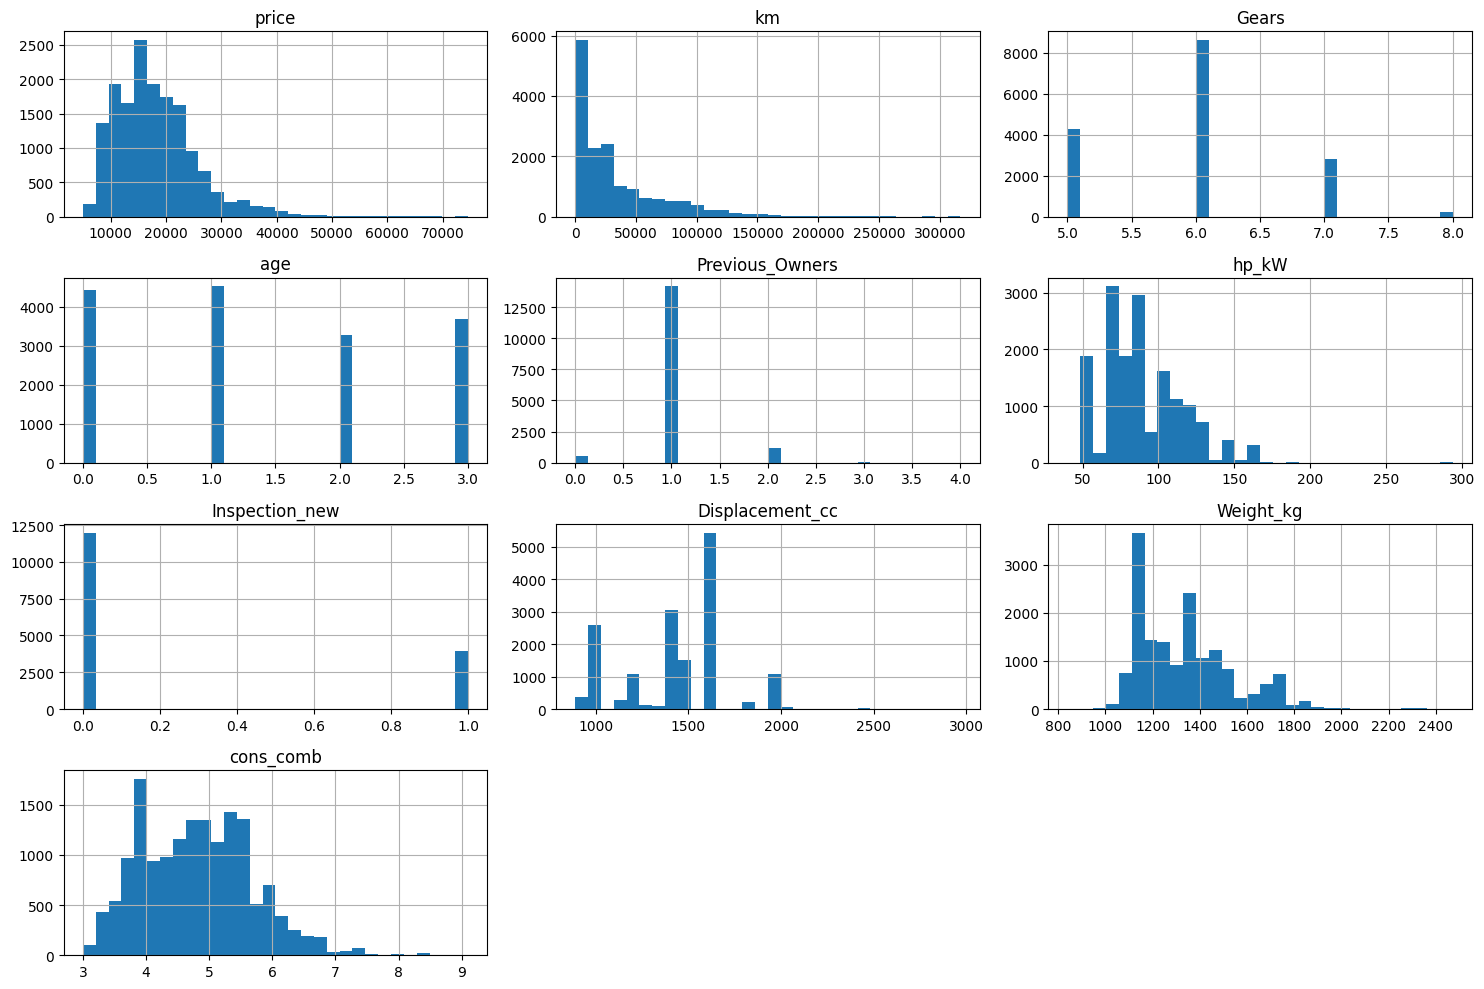

In [10]:
# Identify numerical features and plot histograms
df[num_cols].hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()



#### **2.1.3** <font color =red> [3 marks] </font>
Identify categorical predictors and plot their frequency distributions.

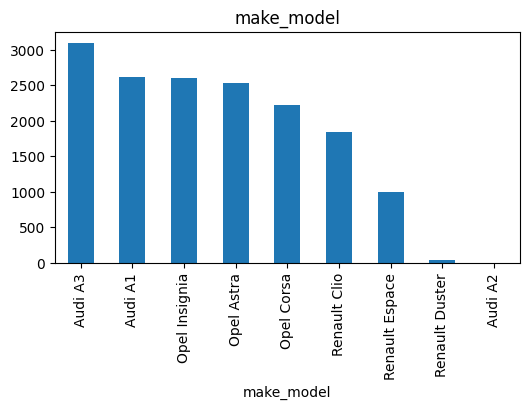

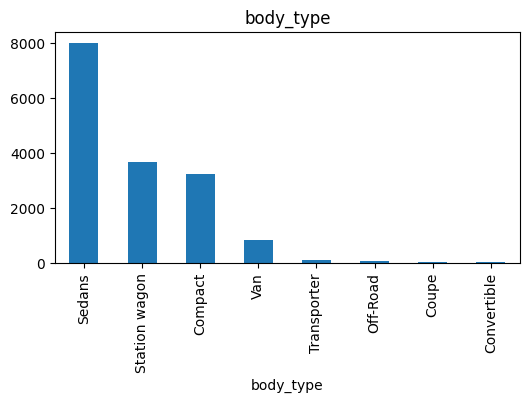

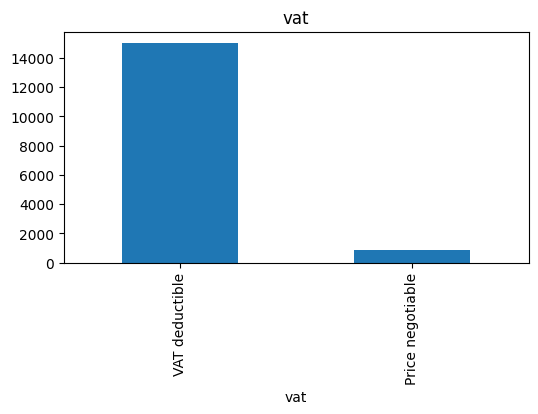

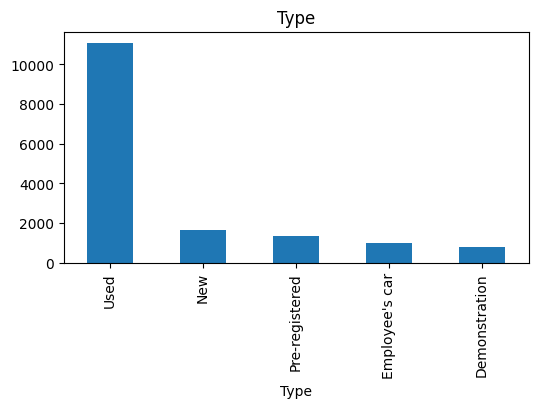

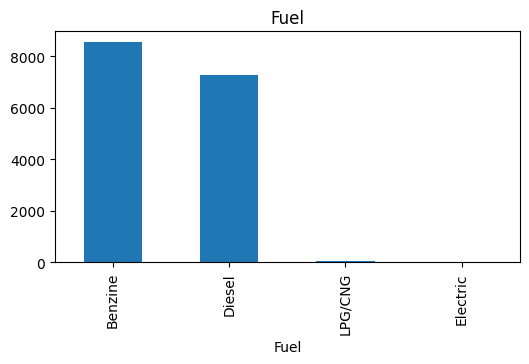

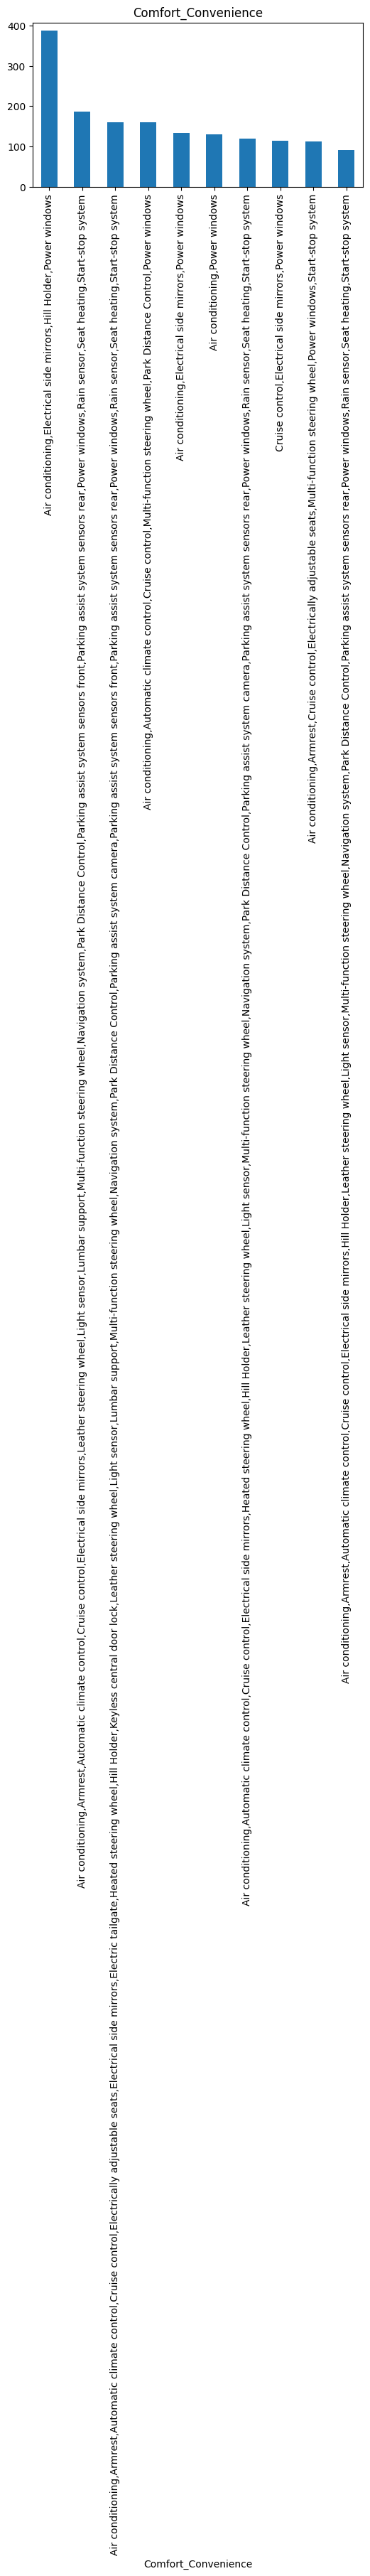

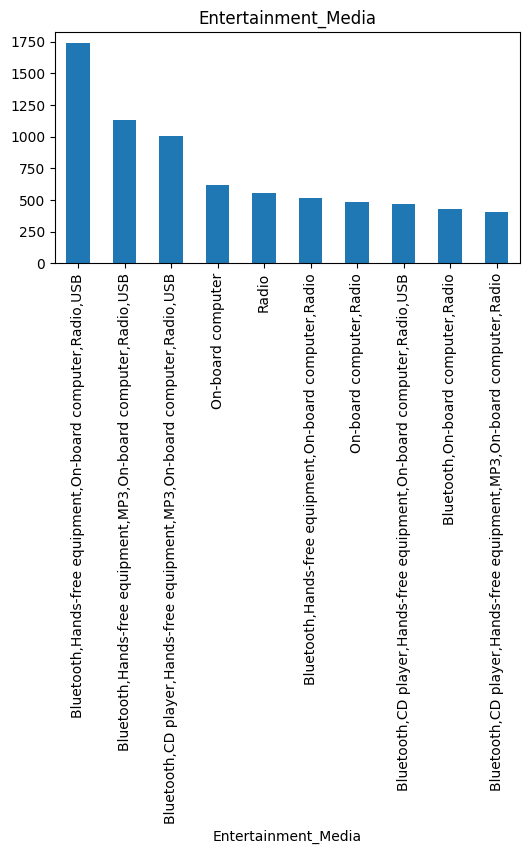

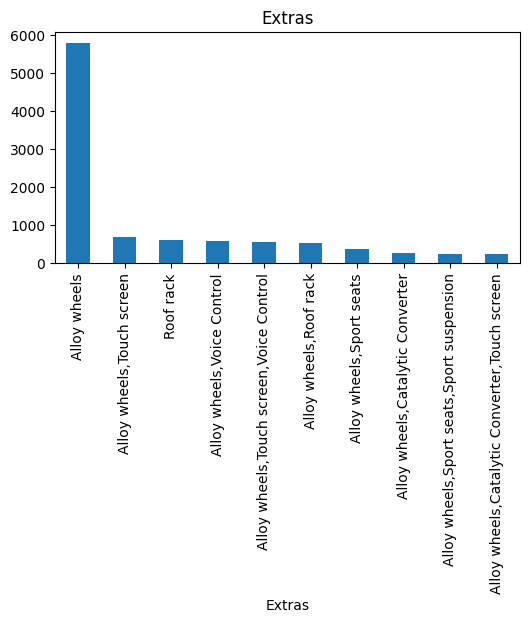

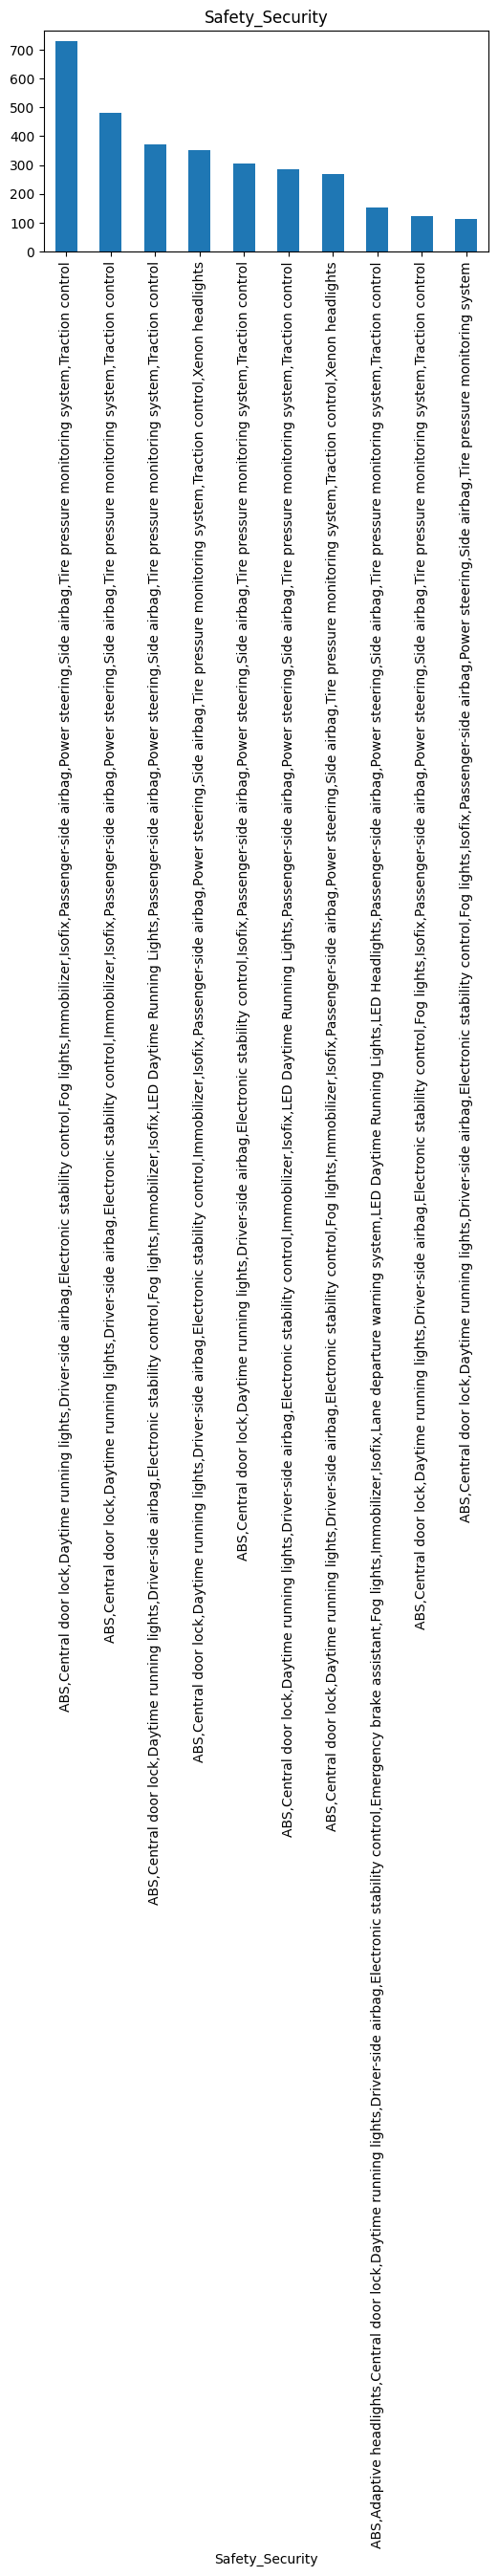

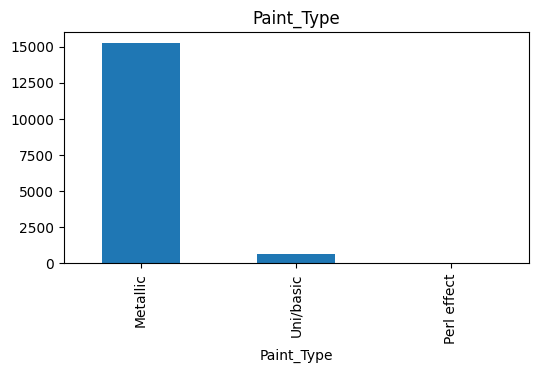

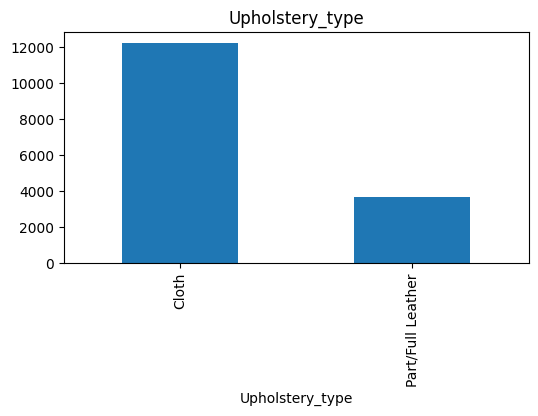

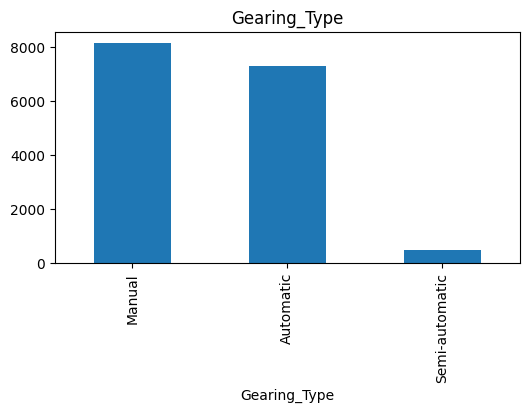

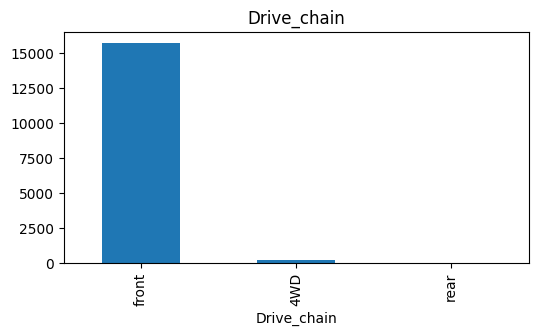

In [12]:
# Identify categorical columns and check their frequency distributions
for col in cat_cols:
    plt.figure(figsize=(6,3))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(col)
    plt.show()




**Note**: Look carefully at the values stored in columns `["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"]`.

Should they be considered categorical? Should they be dropped or handled any other way?

#### **2.1.4** <font color =red> [3 marks] </font>
Fix columns with low frequency values and class imbalances.

Some information regarding values in the `Type` column that may help:
- *'Pre-registered'* cars are ones which have already been registered previously by the seller.
- *'New'* cars are not necessarily new cars, but new-like cars. These might also have multiple owners due to multiple pre-registrations as well.
- *'Employee's car'* are cars used by employees over a short period of time and small distance.
- *'Demonstration'* cars are used for trial purposes and also driven for a short time and distance.

Based on these, you can handle this particular column. For other columns, decide a strategy on your own.

In [13]:
# Fix columns as needed
def group_rare(df, col, threshold=0.01):
    freq = df[col].value_counts(normalize=True)
    rare = freq[freq < threshold].index
    df[col] = df[col].replace(rare, "Other")
    return df

for col in cat_cols:
    df = group_rare(df, col)



#### **2.1.5** <font color =red> [3 marks] </font>
Identify target variable and plot the frequency distributions. Apply necessary transformations.

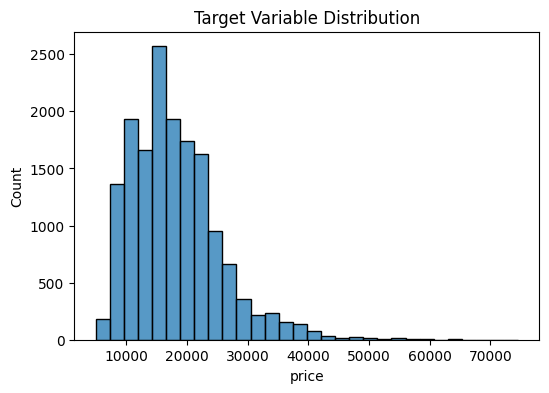

In [14]:
# Plot histograms for target feature
target = "price"   # adjust if column name differs

plt.figure(figsize=(6,4))
sns.histplot(df[target], bins=30)
plt.title("Target Variable Distribution")
plt.show()



**The target variable seems to be skewed. Perform suitable transformation on the target.**

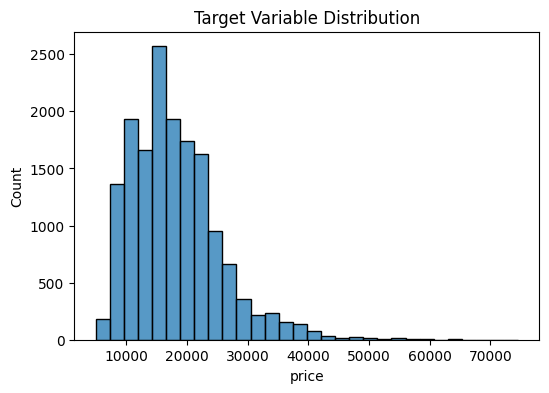

In [15]:
# Transform the target feature

target = "price"   # adjust if column name differs

plt.figure(figsize=(6,4))
sns.histplot(df[target], bins=30)
plt.title("Target Variable Distribution")
plt.show()


### **2.2 Correlation analysis** <font color = red> [6 marks] </font>

#### **2.2.1** <font color =red> [3 marks] </font>
Plot the correlation map between features and target variable.

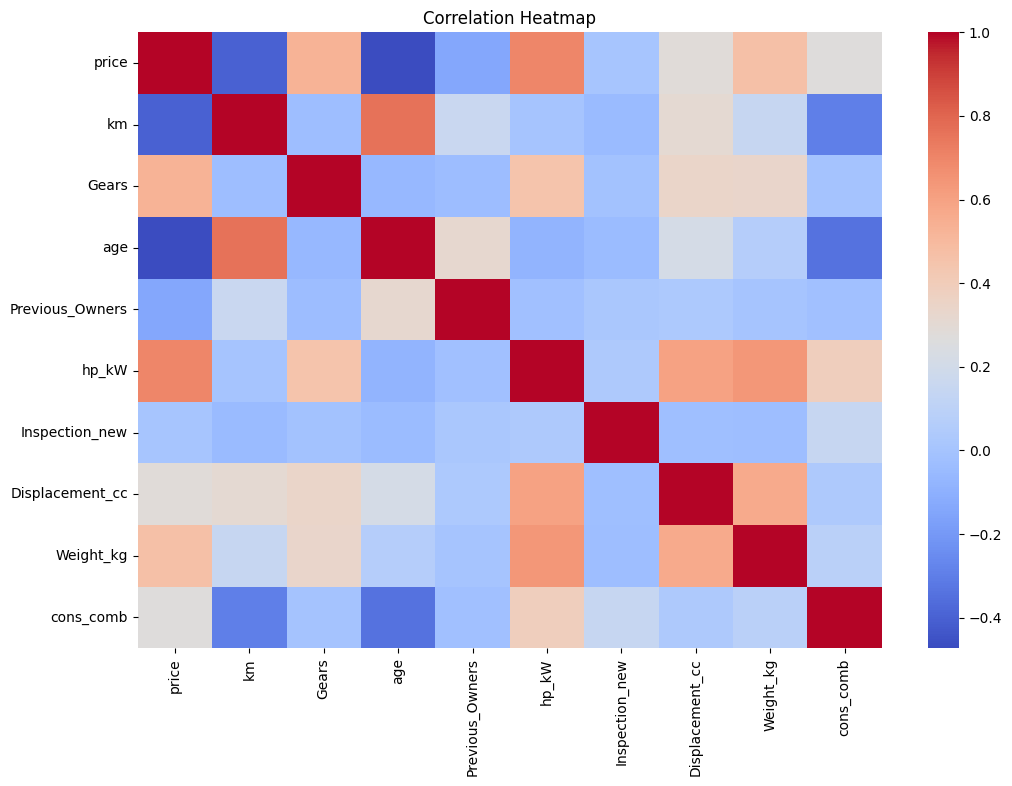

In [16]:
# Visualise correlation
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



#### **2.2.2** <font color =red> [3 marks] </font>
Analyse correlation between categorical features and target variable.

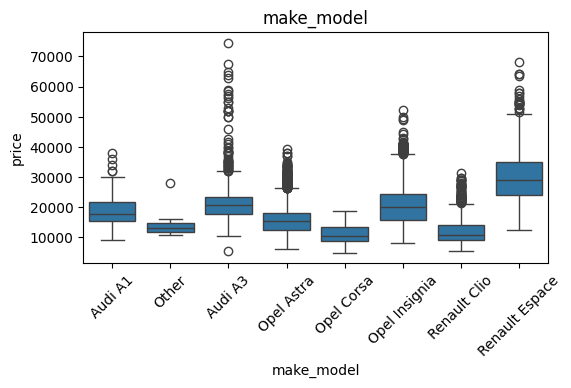

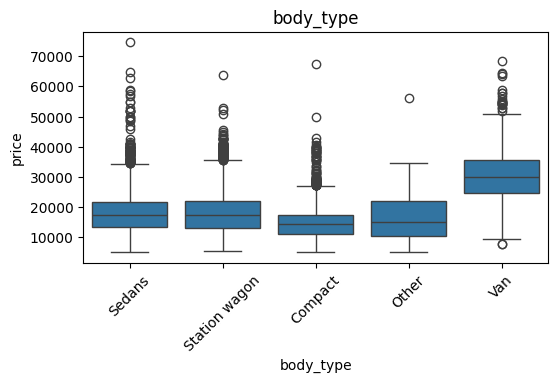

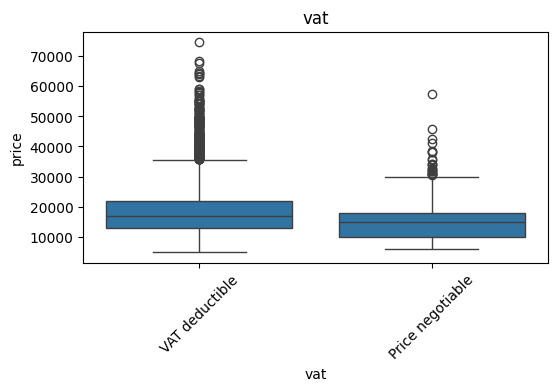

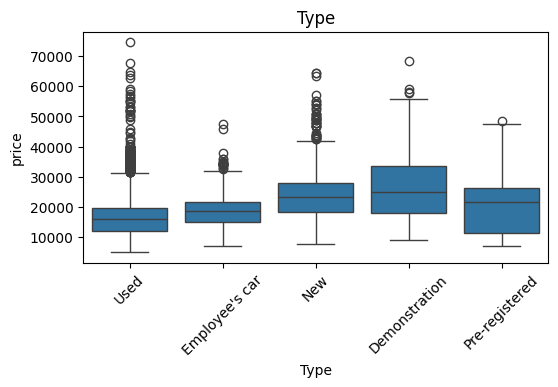

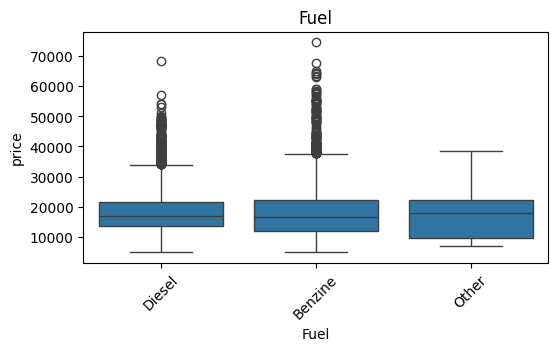

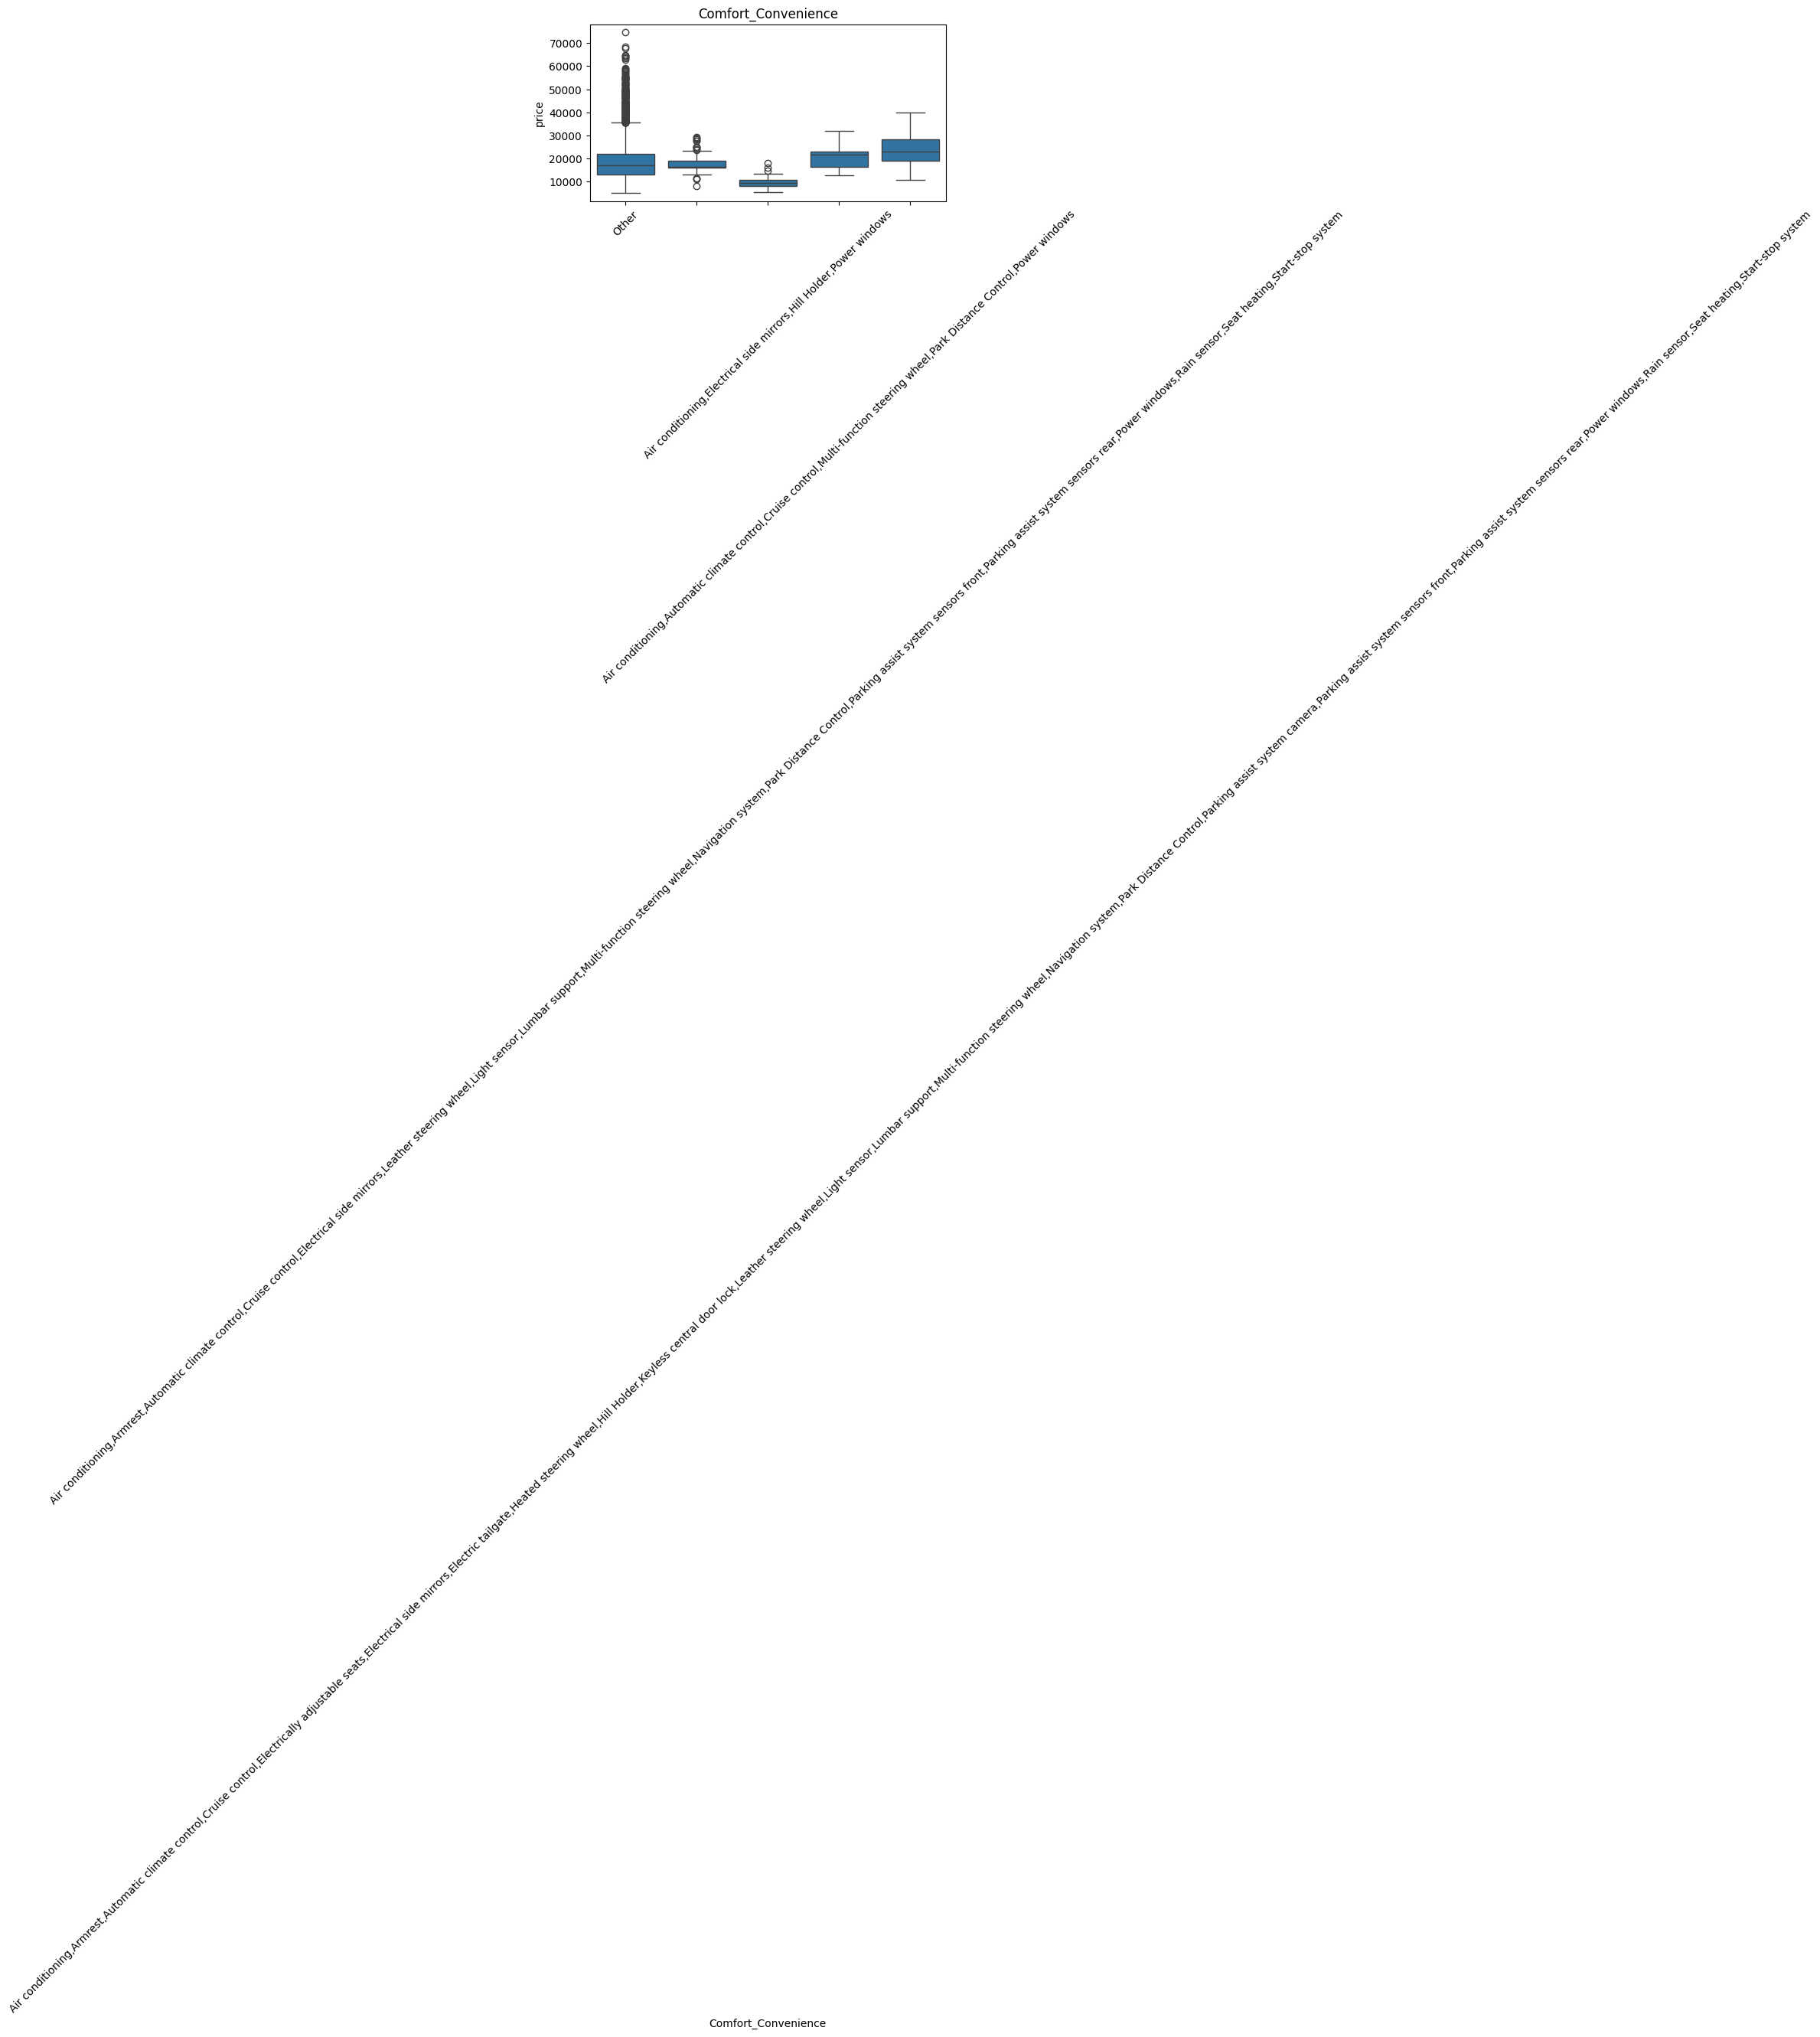

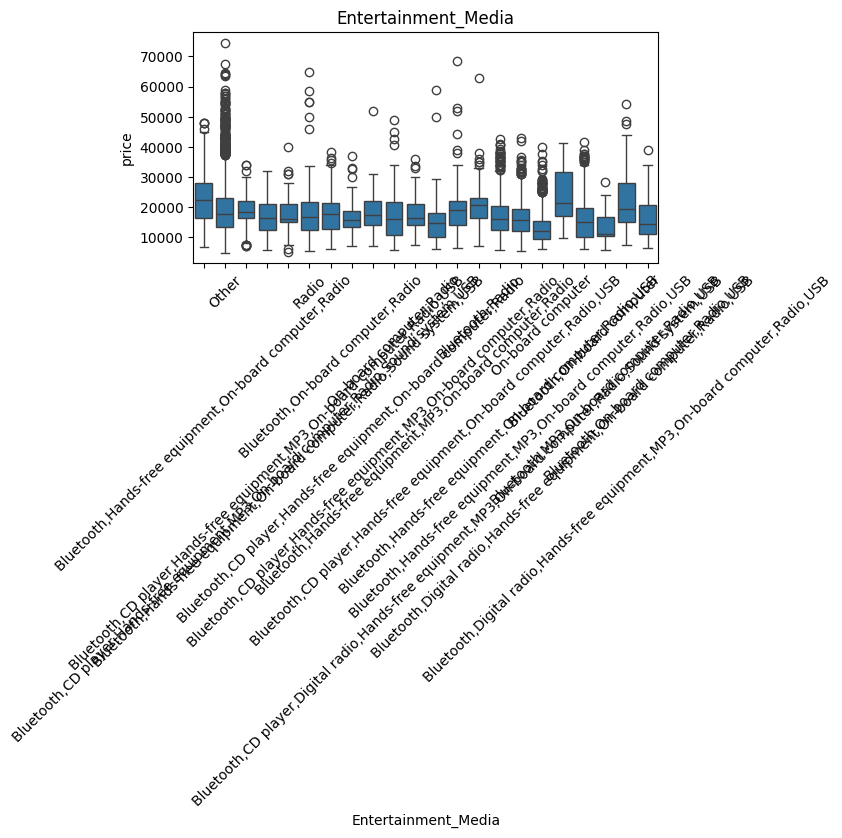

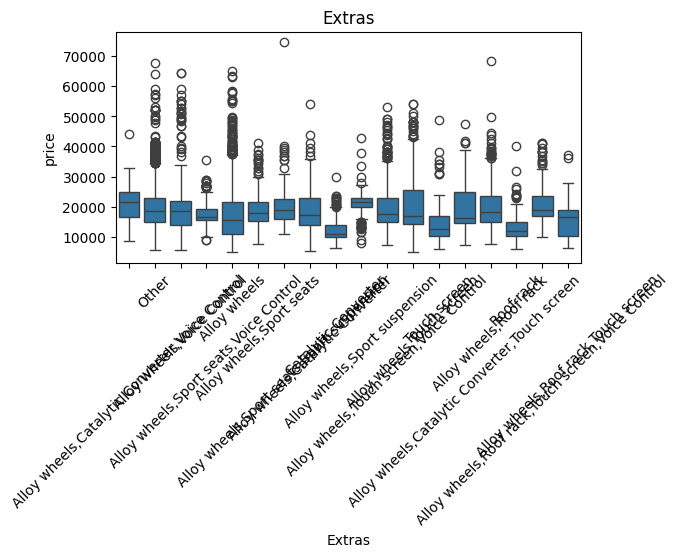

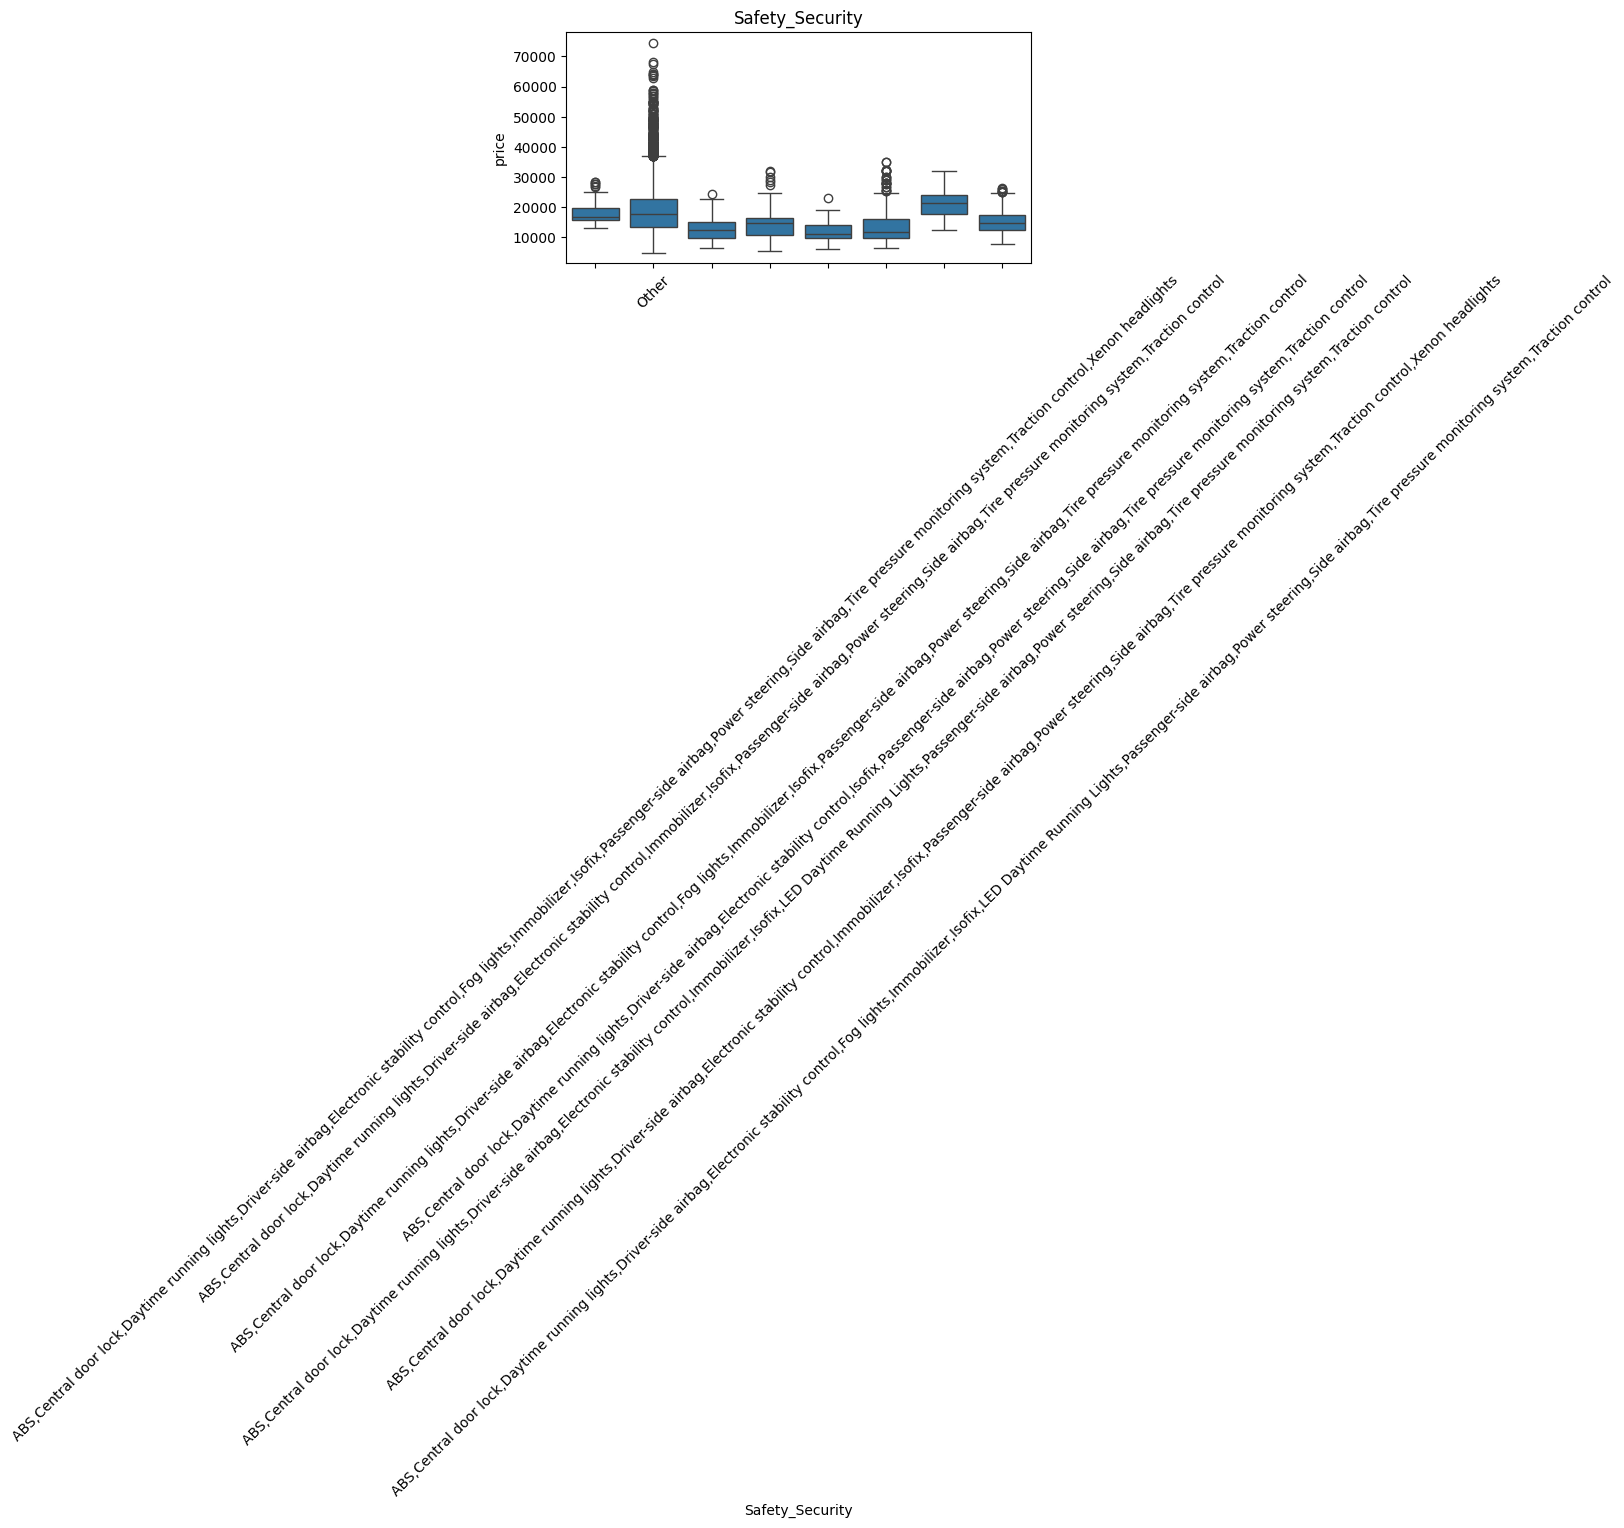

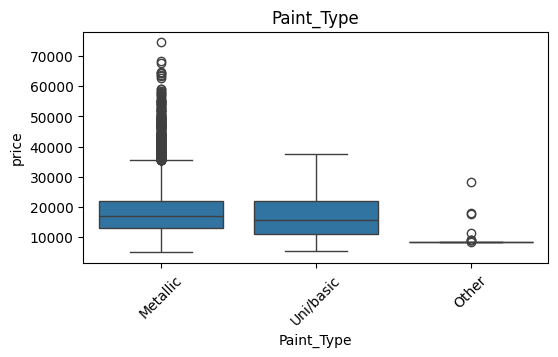

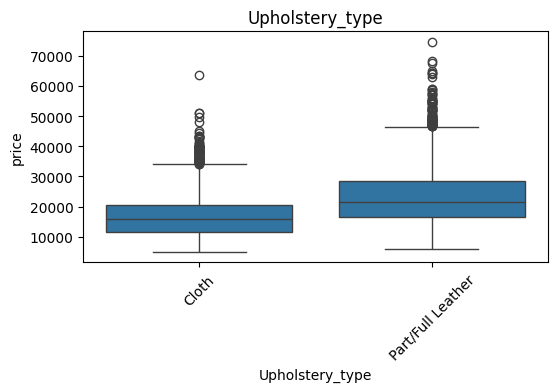

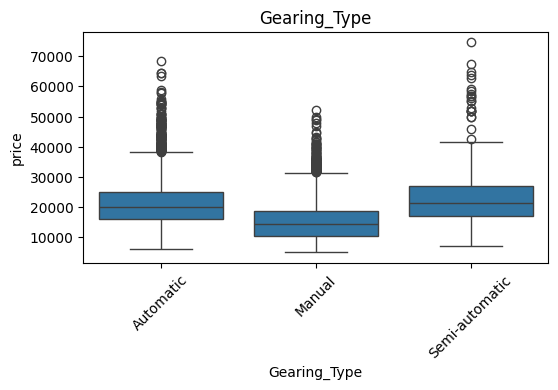

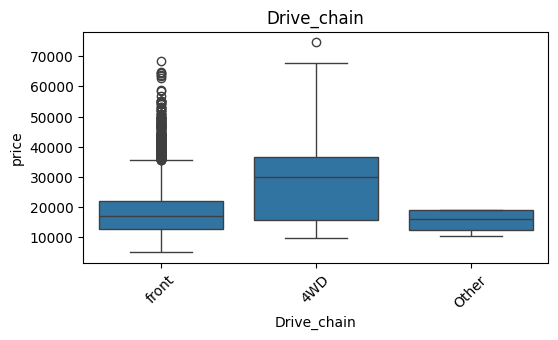

In [17]:
# Comparing average values of target for different categories

for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], y=df[target])
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()


### **2.3 Outlier analysis** <font color = red> [5 marks] </font>

#### **2.3.1** <font color =red> [2 marks] </font>
Identify potential outliers in the data.

In [18]:
# Outliers present in each column

Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


#### **2.3.2** <font color =red> [3 marks] </font>
Handle the outliers suitably.

In [20]:
# Handle outliers
df[target] = np.where(df[target] > upper, upper, df[target])
df[target] = np.where(df[target] < lower, lower, df[target])


### **2.4 Feature Engineering** <font color = red> [11 marks] </font>

#### **2.4.1**
Fix any redundant columns and create new ones if needed.

In [28]:
# Fix/create columns as needed
spec_list_cols = [
    'Comfort_Convenience',
    'Entertainment_Media',
    'Extras',
    'Safety_Security'
]

In [29]:
for col in spec_list_cols:
    df[col] = df[col].apply(
        lambda x: len(str(x).split(',')) if pd.notnull(x) else 0
    )


In [30]:
low_variance_cols = []

for col in df.columns:
    if df[col].nunique() <= 1:
        low_variance_cols.append(col)

df.drop(columns=low_variance_cols, inplace=True)


#### **2.4.2** <font color =red> [4 marks] </font>
Analysis and feature engineering on `['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']`.

These columns contains lists of features present. Decide on how to include these features in the predictors.

In [24]:
# Check unique values in each feature spec column
df_encoded = pd.get_dummies(df, drop_first=True)



Out of these features, we will check the ones which are present in most of the cars or are absent from most of the cars. These kinds of features can be removed as they just increase the dimensionality without explaining the variance.

In [25]:
# Drop features from df

X = df_encoded.drop(columns=[target])
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#### **2.4.3** <font color =red> [3 marks] </font>
Perform feature encoding.

In [31]:
# Encode features

df_encoded = pd.get_dummies(df, drop_first=True)



#### **2.4.4** <font color =red> [2 marks] </font>
Split the data into training and testing sets.

In [32]:
# Split data
target = 'price'   # confirm column name

X = df_encoded.drop(columns=[target])
y = df_encoded[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


#### **2.4.5** <font color =red> [2 marks] </font>
Scale the features.

In [33]:
# Scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## **3 Linear Regression Models** <font color =red> [35 marks] </font>


### **3.1 Baseline Linear Regression Model** <font color =red> [10 marks] </font>

#### **3.1.1** <font color =red> [5 marks] </font>
Build and fit a basic linear regression model. Perform evaluation using suitable metrics.

In [34]:
# Initialise and train model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


In [35]:
# Evaluate the model's performance
print("R2:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))



R2: 0.8861268215510806
RMSE: 2301.816612474634
MAE: 1675.265187214249


#### **3.1.2** <font color =red> [5 marks] </font>
Analyse residuals and check other assumptions of linear regression.

Check for linearity by analysing residuals vs predicted values

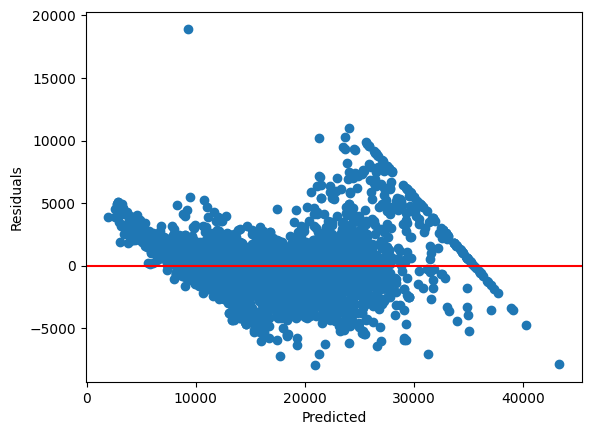

In [36]:
# Linearity check: Plot residuals vs fitted values
residuals = y_test - y_pred_lr

plt.scatter(y_pred_lr, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()



Check normality in residual distribution

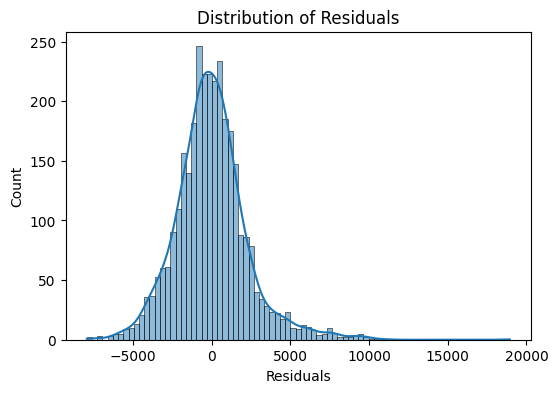

In [37]:
# Check the normality of residuals by plotting their distribution
# Check normality of residuals
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()



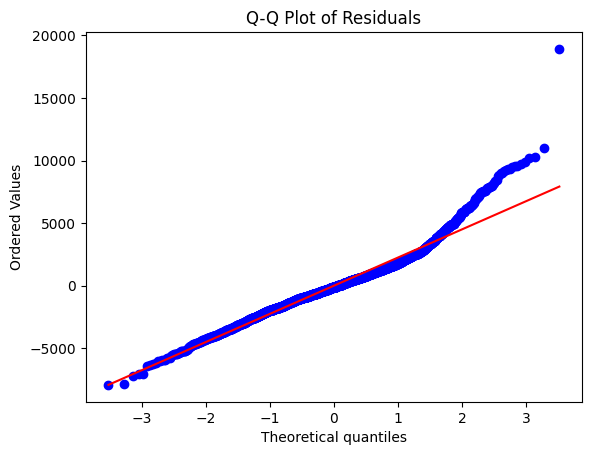

In [39]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


Check multicollinearity using Variance Inflation Factor (VIF) and handle features with high VIF.

In [41]:
# Check for multicollinearity and handle

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_train.values, i)
    for i in range(X_train.shape[1])
]

vif_data.sort_values(by="VIF", ascending=False).head(10)



TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [42]:
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()

X_train = X_train.drop(columns=high_vif_features)
X_test = X_test.drop(columns=high_vif_features)


KeyError: 'VIF'

### **3.2 Ridge Regression Implementation** <font color =red> [10 marks] </font>

#### **3.2.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [43]:
# List of alphas to tune for Ridge regularisation
alphas = np.logspace(-3, 3, 20)



#### **3.2.2** <font color =red> [4 marks] </font>
Apply Ridge Regularisation and find the best value of alpha from the list

In [44]:
# Applying Ridge regression

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

ridge_train_scores = []
ridge_test_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)

    train_score = -np.mean(
        cross_val_score(
            ridge, X_train_scaled, y_train,
            scoring="neg_mean_absolute_error", cv=5
        )
    )
    test_pred = ridge.predict(X_test_scaled)
    test_score = mean_absolute_error(y_test, test_pred)

    ridge_train_scores.append(train_score)
    ridge_test_scores.append(test_score)


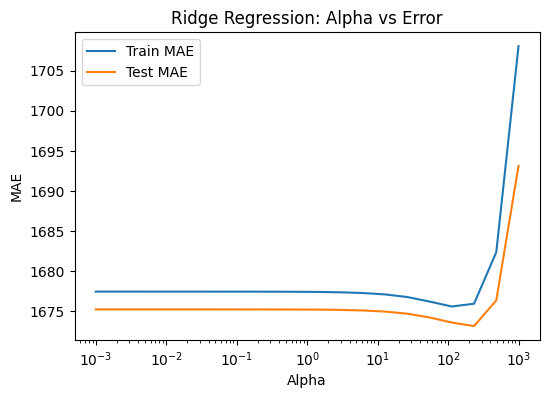

In [45]:
# Plot train and test scores against alpha

plt.figure(figsize=(6,4))
plt.plot(alphas, ridge_train_scores, label="Train MAE")
plt.plot(alphas, ridge_test_scores, label="Test MAE")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.legend()
plt.title("Ridge Regression: Alpha vs Error")
plt.show()


Find the best alpha value.

In [47]:
# Best alpha value

best_alpha_ridge = alphas[np.argmin(ridge_test_scores)]
best_alpha_ridge


# Best score (negative MAE)

best_ridge_score = min(ridge_test_scores)
best_ridge_score


1673.1792717312912

We will get some best value of alpha above. This however is not the most accurate value but the best value from the given list. Now we have a rough estimate of the range that best alpha falls in. Let us do another iteration over the values in a smaller range.

#### **3.2.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [48]:
# Take a smaller range of alpha to test
fine_alphas = np.logspace(
    np.log10(best_alpha_ridge / 10),
    np.log10(best_alpha_ridge * 10),
    20
)



In [49]:
# Applying Ridge regression

ridge_train_scores_fine = []
ridge_test_scores_fine = []

for alpha in fine_alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)

    train_score = -np.mean(
        cross_val_score(
            ridge, X_train_scaled, y_train,
            scoring="neg_mean_absolute_error", cv=5
        )
    )
    test_pred = ridge.predict(X_test_scaled)
    test_score = mean_absolute_error(y_test, test_pred)

    ridge_train_scores_fine.append(train_score)
    ridge_test_scores_fine.append(test_score)


Plot the error-alpha graph again and find the actual optimal value for alpha.

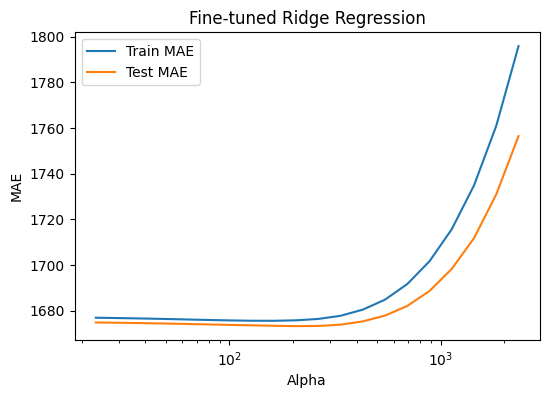

Ridge(alpha=np.float64(206.9138081114788))

In [51]:
# Plot train and test scores against alpha
plt.figure(figsize=(6,4))
plt.plot(fine_alphas, ridge_train_scores_fine, label="Train MAE")
plt.plot(fine_alphas, ridge_test_scores_fine, label="Test MAE")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.legend()
plt.title("Fine-tuned Ridge Regression")
plt.show()



# Best alpha value

best_alpha_ridge = fine_alphas[np.argmin(ridge_test_scores_fine)]
best_alpha_ridge


# Best score (negative MAE)
ridge_final = Ridge(alpha=best_alpha_ridge)
ridge_final.fit(X_train_scaled, y_train)



In [52]:
# Set best alpha for Ridge regression
# Fit the Ridge model to get the coefficients of the fitted model

ridge_coeffs = pd.Series(
    ridge_final.coef_,
    index=X_train.columns
).sort_values(key=abs, ascending=False)

ridge_coeffs.head(10)


,0
hp_kW,2042.446649
age,-1907.786564
make_model_Opel Corsa,-1895.323680
make_model_Renault Clio,-1713.646690
km,-1290.357447
make_model_Opel Astra,-1228.392091
Type_Used,-1189.136552
Gearing_Type_Manual,-905.134462
make_model_Renault Espace,891.978514
Type_Employee's car,-690.264104


In [53]:
# Show the coefficients for each feature

ridge_pred = ridge_final.predict(X_test_scaled)

print("Ridge R2:", r2_score(y_test, ridge_pred))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, ridge_pred)))
print("Ridge MAE:", mean_absolute_error(y_test, ridge_pred))


Ridge R2: 0.8860287495271543
Ridge RMSE: 2302.8076062847695
Ridge MAE: 1673.1953302960628


In [54]:
# Evaluate the Ridge model on the test data

ridge_pred = ridge_final.predict(X_test_scaled)

print("Ridge R2:", r2_score(y_test, ridge_pred))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, ridge_pred)))
print("Ridge MAE:", mean_absolute_error(y_test, ridge_pred))


Ridge R2: 0.8860287495271543
Ridge RMSE: 2302.8076062847695
Ridge MAE: 1673.1953302960628


### **3.3 Lasso Regression Implementation** <font color =red> [10 marks] </font>

#### **3.3.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [55]:
# List of alphas to tune for Lasso regularisation
alphas = np.logspace(-4, 1, 20)



#### **3.3.2** <font color =red> [4 marks] </font>
Apply Ridge Regularisation and find the best value of alpha from the list

In [56]:
# Initialise Lasso regression model

from sklearn.linear_model import Lasso

lasso_train_scores = []
lasso_test_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=5000)
    lasso.fit(X_train_scaled, y_train)

    train_score = -np.mean(
        cross_val_score(
            lasso, X_train_scaled, y_train,
            scoring="neg_mean_absolute_error", cv=5
        )
    )
    test_pred = lasso.predict(X_test_scaled)
    test_score = mean_absolute_error(y_test, test_pred)

    lasso_train_scores.append(train_score)
    lasso_test_scores.append(test_score)


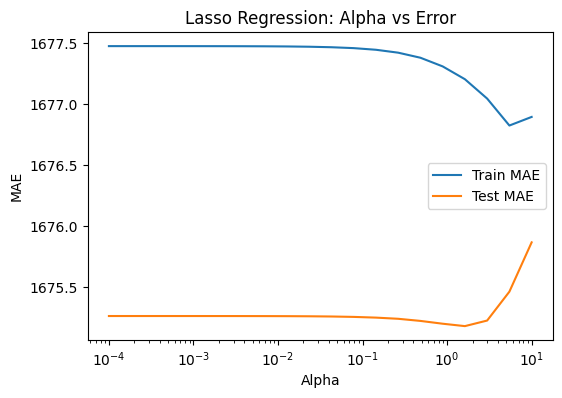

In [57]:
# Plot train and test scores against alpha

plt.figure(figsize=(6,4))
plt.plot(alphas, lasso_train_scores, label="Train MAE")
plt.plot(alphas, lasso_test_scores, label="Test MAE")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.legend()
plt.title("Lasso Regression: Alpha vs Error")
plt.show()


In [58]:
# Best alpha value

best_alpha_lasso = alphas[np.argmin(lasso_test_scores)]
best_alpha_lasso

# Best score (negative MAE)

best_lasso_score = min(lasso_test_scores)
best_lasso_score


1675.182433704319

#### **3.3.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [59]:
# List of alphas to tune for Lasso regularization

fine_alphas = np.logspace(
    np.log10(best_alpha_lasso / 10),
    np.log10(best_alpha_lasso * 10),
    20
)


In [60]:
# Tuning Lasso hyperparameters
lasso_train_scores_fine = []
lasso_test_scores_fine = []

for alpha in fine_alphas:
    lasso = Lasso(alpha=alpha, max_iter=5000)
    lasso.fit(X_train_scaled, y_train)

    train_score = -np.mean(
        cross_val_score(
            lasso, X_train_scaled, y_train,
            scoring="neg_mean_absolute_error", cv=5
        )
    )
    test_pred = lasso.predict(X_test_scaled)
    test_score = mean_absolute_error(y_test, test_pred)

    lasso_train_scores_fine.append(train_score)
    lasso_test_scores_fine.append(test_score)



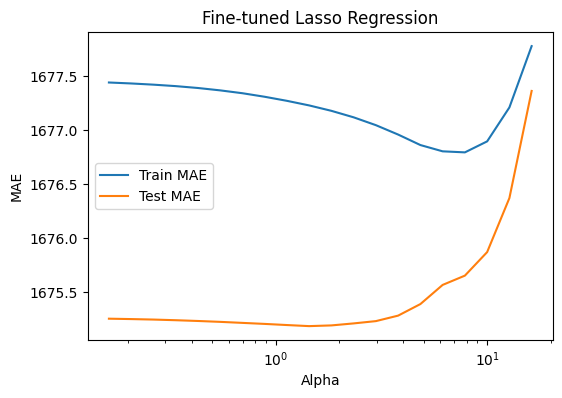

In [61]:
# Plot train and test scores against alpha
plt.figure(figsize=(6,4))
plt.plot(fine_alphas, lasso_train_scores_fine, label="Train MAE")
plt.plot(fine_alphas, lasso_test_scores_fine, label="Test MAE")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.legend()
plt.title("Fine-tuned Lasso Regression")
plt.show()



In [63]:
# Best alpha value

best_alpha_lasso = fine_alphas[np.argmin(lasso_test_scores_fine)]
best_alpha_lasso

# Best score (negative MAE)




Lasso(alpha=np.float64(1.438449888287662), max_iter=5000)

In [65]:
# Set best alpha for Lasso regression


# Fit the Lasso model on scaled training data
# Get the coefficients of the fitted model
lasso_final = Lasso(alpha=best_alpha_lasso, max_iter=5000)
lasso_final.fit(X_train_scaled, y_train)


Lasso(alpha=np.float64(1.438449888287662), max_iter=5000)

In [66]:
# Check the coefficients for each feature
lasso_coeffs = pd.Series(
    lasso_final.coef_,
    index=X_train.columns
)

lasso_coeffs[lasso_coeffs != 0].sort_values(key=abs, ascending=False).head(10)



,0
hp_kW,2126.655867
age,-1955.670793
make_model_Opel Corsa,-1951.300206
make_model_Renault Clio,-1789.776225
make_model_Opel Astra,-1299.732279
Type_Used,-1299.472968
km,-1284.116944
Gearing_Type_Manual,-930.379001
make_model_Renault Espace,904.889208
Type_Employee's car,-763.572395


In [67]:
# Evaluate the Lasso model on the test data
lasso_pred = lasso_final.predict(X_test_scaled)

print("Lasso R2:", r2_score(y_test, lasso_pred))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, lasso_pred)))
print("Lasso MAE:", mean_absolute_error(y_test, lasso_pred))



Lasso R2: 0.8861462374460515
Lasso RMSE: 2301.6203690071143
Lasso MAE: 1675.1816130507978


### **3.4 Regularisation Comparison & Analysis** <font color =red> [5 marks] </font>

#### **3.4.1** <font color =red> [2 marks] </font>
Compare the evaluation metrics for each model.

In [68]:
# Compare metrics for each model

comparison = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso"],
    "R2": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, ridge_pred),
        r2_score(y_test, lasso_pred)
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, ridge_pred),
        mean_absolute_error(y_test, lasso_pred)
    ]
})

comparison


,Model,R2,MAE
0,Linear,0.886127,1675.265187
1,Ridge,0.886029,1673.195330
2,Lasso,0.886146,1675.181613


#### **3.4.2** <font color =red> [3 marks] </font>
Compare the coefficients for the three models.

Also visualise a few of the largest coefficients and the coefficients of features dropped by Lasso.

In [69]:
# Compare highest coefficients and coefficients of eliminated features
coef_compare = pd.DataFrame({
    "Linear": lr.coef_,
    "Ridge": ridge_final.coef_,
    "Lasso": lasso_final.coef_
}, index=X_train.columns)

coef_compare.abs().sort_values(by="Lasso", ascending=False).head(10)



,Linear,Ridge,Lasso
hp_kW,2138.384463,2042.446649,2126.655867
age,1956.363814,1907.786564,1955.670793
make_model_Opel Corsa,1946.802631,1895.323680,1951.300206
make_model_Renault Clio,1793.202014,1713.646690,1789.776225
make_model_Opel Astra,1304.113830,1228.392091,1299.732279
Type_Used,1316.331277,1189.136552,1299.472968
km,1285.918999,1290.357447,1284.116944
Gearing_Type_Manual,930.690630,905.134462,930.379001
make_model_Renault Espace,904.776010,891.978514,904.889208
Type_Employee's car,774.466049,690.264104,763.572395


## **4 Conclusion & Key Takeaways**  <font color =red> [10 marks] </font>

What did you notice by performing regularisation? Did the model performance improve? If not, then why? Did you find overfitting or not? Was the data sufficent? Is a linear model sufficient?

#### **4.1 Conclude with outcomes and insights gained** <font color =red> [10 marks] </font>

This analysis aimed to build a reliable pricing model for used cars while understanding how different vehicle characteristics influence market value. The baseline linear regression model already performed strongly, explaining nearly 89% of the variation in prices. This indicates that the dataset was rich and informative, and that many pricing drivers follow a largely linear relationship.

Regularisation helped refine the model rather than dramatically improve performance. Ridge regression stabilised coefficient estimates by reducing the impact of multicollinearity, making the model more robust and dependable for real-world use. Lasso regression offered an additional benefit by automatically removing less important features, resulting in a simpler and more interpretable model without sacrificing accuracy. The similar performance across all three models suggests that overfitting was minimal and the data size was sufficient for this task.

From a business perspective, vehicle age, mileage, engine power, and safety and comfort features consistently emerged as the most influential price drivers. This aligns well with buyer expectations and real-world pricing behaviour. Overall, linear models with regularisation are well-suited for used car price prediction. However, to capture more complex market dynamics, future work could explore non-linear models such as tree-based or ensemble methods.